In [22]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
from tensorflow import keras
from keras.layers import Dense, Input, InputLayer, Flatten
from tensorflow.keras.models import Sequential, Model
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
import random
from PIL import Image

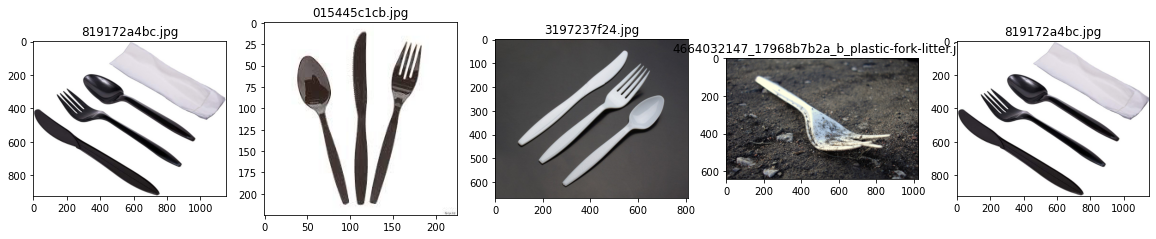

In [10]:
#test print of 5 random images from one folder (cutlery)
plt.figure(figsize=(20,20))
img_folder="C:/Users/catri/OneDrive/Simplon/IA-P2-Euskadi week start 04.04/Projets/Projet P8 - Triof/triof/training_images/Couverts en plastique"
for i in range(5):
    file = random.choice(os.listdir(img_folder))
    image_path= os.path.join(img_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

In [11]:
#setting size for images and the training images folder
IMG_WIDTH=200
IMG_HEIGHT=200
img_folder=r'C:/Users/catri/OneDrive/Simplon/IA-P2-Euskadi week start 04.04/Projets/Projet P8 - Triof/triof/images/'


In [12]:
#function to create the dataset - using CV2
def create_dataset(img_folder):
   
    img_data_array=[]
    class_name=[]
   
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
       
            image_path= os.path.join(img_folder, dir1,  file)
            #Read the image file from the folder and convert it to the right color format.
            image= cv2.imread( image_path, cv2.COLOR_BGR2RGB)
            #Resize the image based on the input dimension required for the model
            image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
            #Convert the image to a Numpy array with float32 as the datatype
            image=np.array(image)
            image = image.astype('float32')
            #Normalize the image array to have values scaled down between 0 and 1 from 0 to 255 for a similar data distribution, which helps with faster convergence
            image /= 255 
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array, class_name

# extract the image array and class name
img_folder=r'C:/Users/catri/OneDrive/Simplon/IA-P2-Euskadi week start 04.04/Projets/Projet P8 - Triof/triof/training_images/'
img_data, class_name =create_dataset(img_folder)

In [13]:
#Create a dictionary for all unique values for the classes
target_dict={k: v for v, k in enumerate(np.unique(class_name))}
target_dict

{'Bouteille plastique': 0,
 'Couverts en plastique': 1,
 'Gobelet en plastique': 2}

In [15]:
#Convert the class_names to their respective numeric value in dictionary
target_val=  [target_dict[class_name[i]] for i in range(len(class_name))]

In [17]:
#Creating & compiling a simple deep learning model
model=tf.keras.Sequential(
        [
            tf.keras.layers.InputLayer(input_shape=(IMG_HEIGHT,IMG_WIDTH, 3)),
            tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=(2, 2), activation='relu'),
            tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2, 2), activation='relu'),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(6)
        ])
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [23]:
#fit our dataset to train the model with img_data (use Numpy array as input)
history = model.fit(x=np.array(img_data, np.float32), y=np.array(list(map(int,target_val)), np.float32), epochs=5)

#alt method using tf.castS
#history = model.fit(x=tf.cast(np.array(img_data), tf.float64), y=tf.cast(list(map(int,target_val)),tf.int32), epochs=5)

Epoch 1/5
6/6 [==============================] - 1s 141ms/step - loss: 11.5694 - accuracy: 0.2822
Epoch 2/5
6/6 [==============================] - 1s 115ms/step - loss: 11.5694 - accuracy: 0.2822
Epoch 3/5
6/6 [==============================] - 1s 87ms/step - loss: 11.5694 - accuracy: 0.2822
Epoch 4/5
6/6 [==============================] - 1s 85ms/step - loss: 11.5694 - accuracy: 0.2822
Epoch 5/5
6/6 [==============================] - 1s 84ms/step - loss: 11.5694 - accuracy: 0.2822


In [29]:
#function to create the dataset - using PIL
def create_dataset_PIL(img_folder):
    
    img_data_array=[]
    class_name=[]
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
       
            image_path= os.path.join(img_folder, dir1,  file)
            #Open the image file from the folder using PIL.
            image= np.array(Image.open(image_path))
            #Resize the image based on the input dimension required for the model
            image= np.resize(image,(IMG_HEIGHT,IMG_WIDTH,3))
            #Convert the image to a Numpy array with float32 as the datatype
            image = image.astype('float32')
            #Normalize the image array for faster convergence
            image /= 255  
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array , class_name

PIL_img_data, class_name=create_dataset_PIL(img_folder)

In [26]:
#Converting text labels to numeric codes as above
target_dict={k: v for v, k in enumerate(np.unique(class_name))}
target_val=  [target_dict[class_name[i]] for i in range(len(class_name))]

In [27]:
#Creating and compiling a simple Deep Learning Model
model=tf.keras.Sequential(
        [
            tf.keras.layers.InputLayer(input_shape=(IMG_HEIGHT,IMG_WIDTH, 3)),
            tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=(2, 2), activation='relu'),
            tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2, 2), activation='relu'),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(6)
        ])
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [28]:
#fit PIL_ilg_data to train the model (use Numpy array - tf.cast is also an option)
history = model.fit(x=np.array(PIL_img_data, np.float32), y=np.array(list(map(int,target_val)), np.float32), epochs=5)

Epoch 1/5
6/6 [==============================] - 1s 154ms/step - loss: 9.6428 - accuracy: 0.3374
Epoch 2/5
6/6 [==============================] - 1s 101ms/step - loss: 10.3828 - accuracy: 0.3558
Epoch 3/5
6/6 [==============================] - 1s 99ms/step - loss: 10.3828 - accuracy: 0.3558
Epoch 4/5
6/6 [==============================] - 1s 84ms/step - loss: 10.3828 - accuracy: 0.3558
Epoch 5/5
6/6 [==============================] - 1s 92ms/step - loss: 10.3828 - accuracy: 0.3558
